In [1]:
import os,shutil
import h5py
from h5glance import H5Glance
import matplotlib.pyplot as plt
import numpy as np

# Helpers
from SimEx.Utilities.Units import meter, electronvolt, joule, radian

# PMI
from SimEx.Calculators.XMDYNDemoPhotonMatterInteractor import XMDYNDemoPhotonMatterInteractor

# Simple Beam Parameters
from SimEx.Parameters.PhotonBeamParameters import PhotonBeamParameters

# Diffraction
from SimEx.Parameters.DetectorGeometry import DetectorGeometry, DetectorPanel
from SimEx.Parameters.SingFELPhotonDiffractorParameters import SingFELPhotonDiffractorParameters
from SimEx.Calculators.SingFELPhotonDiffractor import SingFELPhotonDiffractor

# Analysis
from SimEx.Analysis.XFELPhotonAnalysis import XFELPhotonAnalysis
from SimEx.Analysis.DiffractionAnalysis import DiffractionAnalysis

import matplotlib.colors as colors

initializing ocelot...



In [2]:
panel = DetectorPanel(ranges={"fast_scan_min" : 0, "fast_scan_max" : 124,
                              "slow_scan_min" : 0, "slow_scan_max" : 124},
                      pixel_size=1760.0e-6*meter,
                      energy_response=1.0/electronvolt,
                      distance_from_interaction_plane=0.13*meter,
                      corners={"x" : -62, "y": -62},
                      )
detector_geometry = DetectorGeometry(panels=panel)

In [3]:
diffraction_parameters = SingFELPhotonDiffractorParameters(
                                               uniform_rotation=True,
                                               calculate_Compton=True,
                                               slice_interval=100,
                                               number_of_slices=100,
                                               number_of_diffraction_patterns=1,
                                               detector_geometry=detector_geometry,
                                               #forced_mpi_command='mpirun --use-hwthread-cpus',
                                               #forced_mpi_command='mpirun -np 36',
                                               forced_mpi_command='mpirun -np 1',
                                              )

PMI_path = '/gpfs/exfel/data/user/juncheng/EMCProject/data/simulation/pmi'
diff_out = './'
diffractor = SingFELPhotonDiffractor(parameters=diffraction_parameters,
                                     input_path=PMI_path,
                                     output_path=diff_out)

In [4]:
diffractor.backengine()
# diffractor.saveH5()

0

In [5]:
H5Glance('diffr_out_0000001.h5')

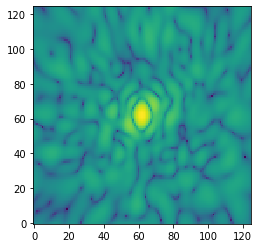

In [6]:
with h5py.File('diffr_out_0000001.h5','r') as f:
    for i,iteration in enumerate(f['data']):
        if i < 2:
            diffr = f['data'][iteration]['diffr'][...]
            plt.figure()
            plt.imshow(diffr,norm=colors.LogNorm(vmin=diffr.min(), vmax=diffr.max()),origin='lower')

In [7]:
print (diffr.mean())
multi_diffr = diffr*1e7
print (multi_diffr.mean())

0.0017611434294709633
17611.434294709634


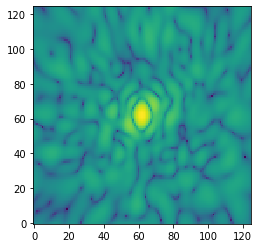

In [8]:
plt.figure()
plt.imshow(multi_diffr,norm=colors.LogNorm(vmin=multi_diffr.min(), vmax=multi_diffr.max()),origin='lower')

In [27]:
int_diffr = np.int8(multi_diffr)
print (int_diffr.mean(),int_diffr.max(),int_diffr.min())

1.328832 127 -128


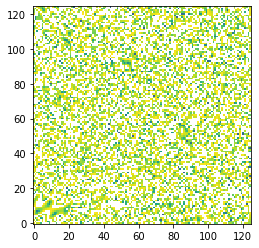

In [28]:
plt.imshow(int_diffr,norm=colors.LogNorm(vmin=int_diffr.min()+128.1, vmax=int_diffr.max()),origin='lower')

In [39]:
with h5py.File('../array3D_int_10000_250x250.h5','r') as f:
    data_int = f['diffr'][9]
    print (data_int.mean(),data_int.max(),data_int.min())

0.001232 1 0


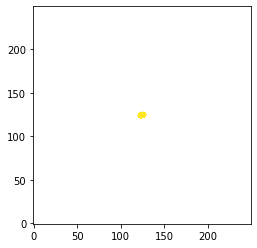

In [40]:
plt.imshow(data_int,norm=colors.LogNorm(vmin=data_int.min()+.1, vmax=data_int.max()),origin='lower')

In [53]:
with h5py.File('array_test.h5','w') as f:
    dset_diffr = f.create_dataset("diffr", data=multi_diffr,dtype='i8')

In [54]:
with h5py.File('./array_test.h5','r') as f:
    data_int = f['diffr'][...]
    print (data_int.mean(),data_int.max(),data_int.min())

17610.933952 6485736 0


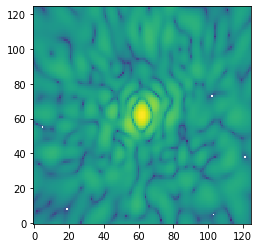

In [55]:
plt.imshow(data_int,norm=colors.LogNorm(vmin=data_int.min()+.1, vmax=data_int.max()),origin='lower')

In [68]:
file_name = '../../../data/simulation/diffr10000.h5'

with h5py.File(file_name,'r') as f:
    data_int = f['data/0000001/diffr'][...]*1e9
    print (data_int.mean(),data_int.max(),data_int.min())

4926.2568486675955 1610326.290854833 0.0052463660308435705


In [ ]:
plt.imshow(data_int,norm=colors.LogNorm(vmin=data_int.min(), vmax=data_int.max()),origin='lower')

In [69]:
with h5py.File('array_test.h5','w') as f:
    data_diffr = f.create_dataset("diffr", data=data_int,dtype='i8')

In [70]:
with h5py.File('./array_test.h5','r') as f:
    data_int = f['diffr'][...]
    print (data_int.mean(),data_int.max(),data_int.min())

4925.756576 1610326 0


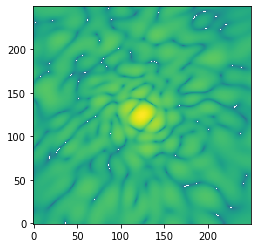

In [71]:
plt.imshow(data_int,norm=colors.LogNorm(vmin=data_int.min()+0.0001, vmax=data_int.max()),origin='lower')